In [1]:
import sys
if sys.platform.startswith('linux'): # or win
    print("in linux")
    file_path = "/home/ncslaber/realSense/catkin_ws/src/depth_app/scripts/"
#     sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
else:
    file_path = r"G:/我的雲端硬碟/0327_align_depth/" 


in linux


In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import cv2
from matplotlib.ticker import LinearLocator
import matplotlib.ticker as ticker
import statistics as sta
import math

In [4]:
npDepth = []
npDepth = np.load(file_path+"tree_turn.npy")
# with open(file_path + 'output.csv', 'r') as csvfile:
#   rows = csv.reader(csvfile, delimiter=',')
#   for row in rows:
#     npDepth.append(row)
# npDepth = np.asanyarray(npDepth)
# print(npDepth.dtype) # U5 means string length < 5
# print(npDepth.shape)
# npDepth = npDepth.astype('uint16')
npDepthF = cv2.convertScaleAbs(npDepth, alpha=0.04) # 6m
npDepthF_color = cv2.applyColorMap(npDepthF, cv2.COLORMAP_JET)
cv2.imshow("filtered", npDepthF_color)
cv2.imshow("filtered", npDepthF)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# ------- plot fig -------
# def plot_fig(title, data):
#     fig, ax = plt.subplots(figsize=(10,5))
#     plt.plot(data, linewidth=1.0, color='orange')
#     plt.title(title, fontsize=16)

In [69]:
# ------- array dealing -------
# a = np.array(range((480-170), 480))
# b = np.array(range(171))
# c = np.array([1,1,1])
# print(a[:3])
# print(a[476:])
# print(b[:3])
# print(b[168:])
# c*10
# a = HOG_wind[0][HOG_wind[0] != 0]
# a.shape

[310 311 312]
[]
[0 1 2]
[168 169 170]


array([10, 10, 10])

0 19
20 39
40 59
60 79


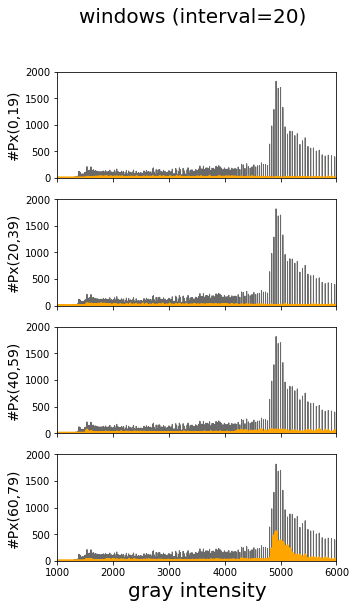

80 99
100 119
120 139
140 159


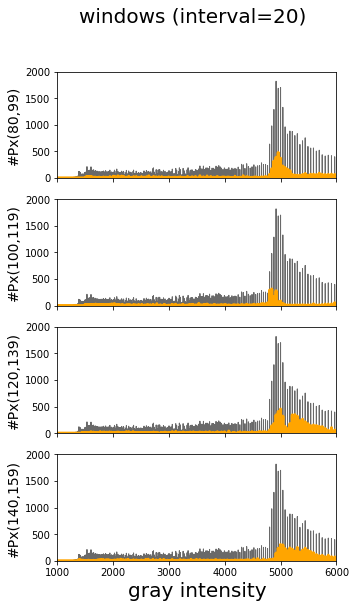

In [32]:
# fig, ax = plt.subplots(figsize=(5,1)) # subplots() without arguments returns a Figure and a single Axes.

HOG_s = np.zeros(65536)
for i in range((480-170)):
    for j in range(640):
        index = npDepth[i][j]
        HOG_s[index] = HOG_s[index]+1
# plt.plot(HOG_s, linewidth=1.0, color='blue', label='sky')

HOG_g = np.zeros(65536)
for i in range((480-170), 480):
    for j in range(640):
        index = npDepth[i][j]
        HOG_g[index] = HOG_g[index]+1
# plt.plot(HOG_g, linewidth=1.0, color='green', label='ground')

HOG_l = np.zeros(65536)
for i in range(480):
    for j in range(320):
        index = npDepth[i][j]
        HOG_l[index] = HOG_l[index]+1
# plt.plot(HOG_l, linewidth=1.0, color='#696969', label='left')

HOG_r = np.zeros(65536)
for i in range(480):
    for j in range(320, 640):
        index = npDepth[i][j]
        HOG_r[index] = HOG_r[index]+1
# plt.plot(HOG_r, linewidth=1.0, color='#008b8b', label='right')

for p in range(2):
    HOG_wind = np.zeros((4,65536))
    fig, axs = plt.subplots(4,figsize=(5,9),sharex=True)
    for k in range(4):
         # nrows=2, ncols=3, figsize=(5,1):5*1(inch^2), dip=100(pi/inch) 
        for i in range(480):
            for j in range(80*p+k*20, 80*p+k*20+20):
                index = npDepth[i][j]
                HOG_wind[k][index] = HOG_wind[k][index]+1
        npDepthF_copy = np.copy(npDepthF)
        image_ColorMap = cv2.applyColorMap(npDepthF_copy, cv2.COLORMAP_JET);
        cv2.line(image_ColorMap, (80*p+k*20,0),(80*p+k*20,640),(255,255,255),3)
        cv2.line(image_ColorMap, (80*p+k*20+19,0),(80*p+k*20+19,640),(255,255,255),3)
        print(80*p+k*20, 80*p+k*20+20-1)
        cv2.imshow("windows", image_ColorMap)
        cv2.waitKey(0)
        axs[k].set_ylabel('#Px('+str(80*p+k*20)+','+str(80*p+k*20+20-1) + ')', fontsize=14)
#         axs[k].plot(HOG_r, linewidth=1.0, color='#008b8b', label='right')
        axs[k].plot(HOG_l, linewidth=1.0, color='#696969', label='left')
        axs[k].plot(HOG_wind[k], linewidth=1.0, color='orange', label='winodw', LineWidth=3)
#     ax.legend(fontsize=16)
        fig.suptitle('windows (interval=20)', fontsize=20)
    for ax in axs.flat:
        ax.set_xlabel('gray intensity', fontsize=20)
#         ax.set_xlabel('gray intensity', fontsize=16)
        ax.set_xlim(1000, 6000)
        ax.set_ylim(0, 2000)
#         ax.set_ylabel('number of pixel', fontsize=16)
        ax.label_outer()
    plt.show()

    #     fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    #     fig.suptitle('Aligning x-axis using sharex')
    #     ax1.plot(x, y)
    #     ax2.plot(x + 1, -y)


cv2.destroyAllWindows()

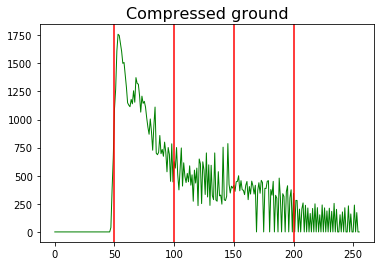

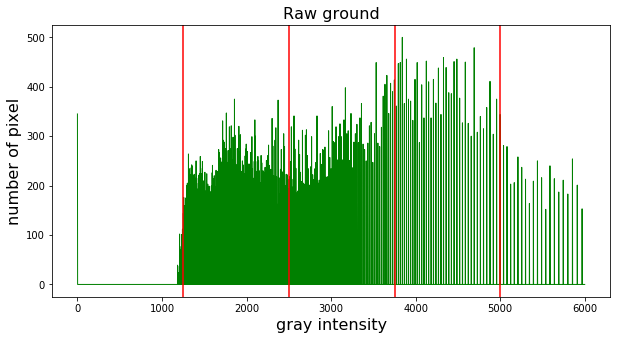

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(HOG_g[:6000], linewidth=1.0, color='green', label='ground')
plt.title('Raw ground', fontsize=16)
plt.xlabel('gray intensity', fontsize=16)
plt.ylabel('number of pixel', fontsize=16)

plt.axvline(x=1250, color='r')
plt.axvline(x=2500, color='r')
plt.axvline(x=3750, color='r')
plt.axvline(x=5000, color='r')

plt.show()

In [8]:
a = np.array([0,0,1,2,3])
b = a!=0
a[np.array([False, True, False,True,True])]

array([0, 2, 3])

In [42]:
a = np.array(([1,2,3],[4,5,6],[7,8,9]))
a[1]

array([4, 5, 6])

In [38]:
import statistics

In [43]:
npAvg = np.zeros(20)
npStd = np.zeros(20)
init = False
layer = 0
height, width = npDepthF.shape

npDepthF_copy = np.copy(npDepth)
record_mean = []
record_diff = []

while(1):
    for i in range(20): # every 10 pixel interval
        tmp = npDepthF_copy[:,int((i+1)+layer*20)][npDepthF_copy[:,int((i+1)+layer*20)] != 0] # 
        #tmp = tmp[tmp != 255]
        std_ = statistics.stdev(tmp)
        
        acc = 0
        for j in range(len(tmp)):
            acc = acc+tmp[j]
        npAvg[i] = acc/len(tmp) #
        npStd[i] = std_
        
    mean_area_now = (sta.mean(npAvg))
    std_area_now = (sta.mean(npStd))
    
#     record_mean.append(mean_area_now)
    if layer > 32:
        break
    cv2.line(npDepthF_copy, (80*p+k*20,0),(80*p+k*20,640),(255,255,255),3)
    cv2.line(npDepthF_copy, (80*p+k*20+19,0),(80*p+k*20+19,640),(255,255,255),3)
    cv2.putText(npDepthF_copy, #numpy array on which text is written
            str(math.trunc(mean_area_now)), #text
            (i*20+25,320+15), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,0,0), #font color
            3)
    cv2.imshow("windows", image_ColorMap)
    cv2.waitKey(0)

    '''
    if init == False:
        init = True
        median_area_past = median_area_now
        layer = layer + 1
        continue
    if median_area_now - median_area_past > 5000:
        record_diff.append(median_area_now-median_area_past)
        mask = np.zeros_like(npDepthF)
        region_of_interest_vertices = [(0, 0),(0, height-layer*10),(width, height-layer*10),(width, 0)]
        cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), 255)
        masked_img = cv2.bitwise_and(npDepthF_copy, mask)
        # masked_img = cv2.cvtColor(masked_img, cv2.COLOR_GRAY2BGR)
        cv2.putText(masked_img, #numpy array on which text is written
            str(math.trunc(median_area_now)), #text
            (40+25,height-layer*10+15), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,0,0), #font color
            3)
        cv2.imshow('Subtraction', masked_img)
        cv2.waitKey(0)
        break
    else:
        mask = np.zeros_like(npDepthF)
        region_of_interest_vertices = [(0, 0),(0, height-layer*10),(width, height-layer*10),(width, 0)]
        cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), 255)
        masked_img = cv2.bitwise_and(npDepthF_copy, mask)
        # masked_img = cv2.cvtColor(masked_img, cv2.COLOR_GRAY2BGR)
        cv2.putText(masked_img, #numpy array on which text is written
            str(math.trunc(median_area_now)), #text
            (40+25,height-layer*10+15), #position at which writing has to start
            cv2.FONT_HERSHEY_SIMPLEX, #font family
            0.9, #font size
            (255,0,0), #font color
            3)
        cv2.imshow('threshold', masked_img)
        cv2.waitKey(0)
        record_diff.append(median_area_now-median_area_past)
        median_area_past = median_area_now
        layer = layer+1
    '''
# plt.scatter(range(len(record_mean)),record_mean, c='r')
plt.plot(record_mean)
plt.xlabel('pixel height',fontsize=16)
plt.ylabel('gray intensity',fontsize=16)
plt.ylim(-1000,25000)
plt.title('average depth (interval=10pixel)',fontsize=16)
plt.show()

plt.scatter(range(len(record_diff)),record_diff, c='r')
plt.xlabel('pixel height',fontsize=16)
plt.ylabel('difference',fontsize=16)
plt.title('difference depth (interval=10pixel)',fontsize=16)
plt.ylim(-1000,10500)
plt.plot(record_diff)
plt.show()
cv2.destroyAllWindows()

/usr/lib/python3.5/statistics.py:503: RuntimeWarning: overflow encountered in ushort_scalars
  T, total, count = _sum((x-c)**2 for x in data)
/usr/lib/python3.5/statistics.py:506: RuntimeWarning: overflow encountered in ushort_scalars
  U, total2, count2 = _sum((x-c) for x in data)


AssertionError: 

In [15]:
cv2.imshow('threshold3', npDepthF_copy)
cv2.waitKey(0)

111

In [ ]:
ret, npDepthF_copy = cv2.threshold(npDepthF_copy, 230, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('binarize', npDepthF_copy)
cv2.waitKey(0)
mask = np.zeros_like(npDepthF_copy)   
region_of_interest_vertices = [(0, 0),(0, height-layer*10),(width, height-layer*10),(width, 0)] #Let k=17
cv2.fillPoly(mask, np.array([region_of_interest_vertices], np.int32), 255)
masked_img = cv2.bitwise_and(npDepthF_copy, mask)
cv2.imshow('threshold3', masked_img)
cv2.waitKey(0)
ret, masked_img = cv2.threshold(masked_img, 170, 255, cv2.THRESH_BINARY)
cv2.imshow('threshold4', masked_img)
cv2.waitKey(0)